In [1]:
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import seaborn as sns

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt

## Reading and processing data

In [3]:
filepath = 'digital_marketing_campaign_dataset.csv'
marketing_data = pd.read_csv(filepath, sep=',')

marketing_data.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [4]:
marketing_data.dtypes

CustomerID               int64
Age                      int64
Gender                  object
Income                   int64
CampaignChannel         object
CampaignType            object
AdSpend                float64
ClickThroughRate       float64
ConversionRate         float64
WebsiteVisits            int64
PagesPerVisit          float64
TimeOnSite             float64
SocialShares             int64
EmailOpens               int64
EmailClicks              int64
PreviousPurchases        int64
LoyaltyPoints            int64
AdvertisingPlatform     object
AdvertisingTool         object
Conversion               int64
dtype: object

In [5]:
marketing_data.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


Conversion rate = clicks / actions

In [6]:
marketing_data.isna()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
print(marketing_data.where(marketing_data.isna() == True).dropna())

Empty DataFrame
Columns: [CustomerID, Age, Gender, Income, CampaignChannel, CampaignType, AdSpend, ClickThroughRate, ConversionRate, WebsiteVisits, PagesPerVisit, TimeOnSite, SocialShares, EmailOpens, EmailClicks, PreviousPurchases, LoyaltyPoints, AdvertisingPlatform, AdvertisingTool, Conversion]
Index: []


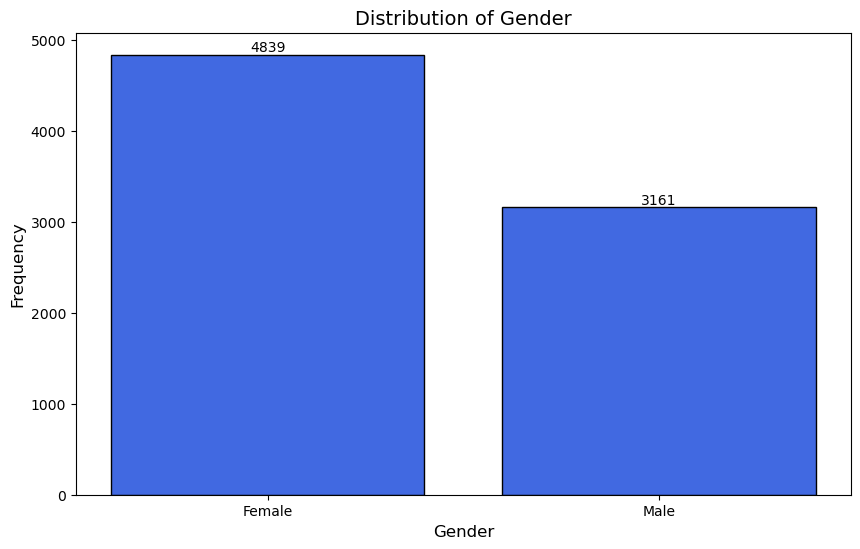

In [22]:
gender_counts = marketing_data['Gender'].value_counts()

# Plotting the bar plot for categorical data
plt.figure(figsize=(10, 6))
plt.bar(gender_counts.index, gender_counts.values, color='royalblue', edgecolor='black')

# Adding title and labels
plt.title('Distribution of Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add frequency values on top of each bar
for i in range(len(gender_counts)):
    plt.text(i, gender_counts.iloc[i], str(gender_counts.iloc[i]), ha='center', va='bottom', fontsize=10)

# Display gridlines for better readability
#plt.grid(True)

# Show the plot
plt.show()

The histogram indicates that the proportion of female customers is slightly higher than that of male customers. However, the difference is not significant.

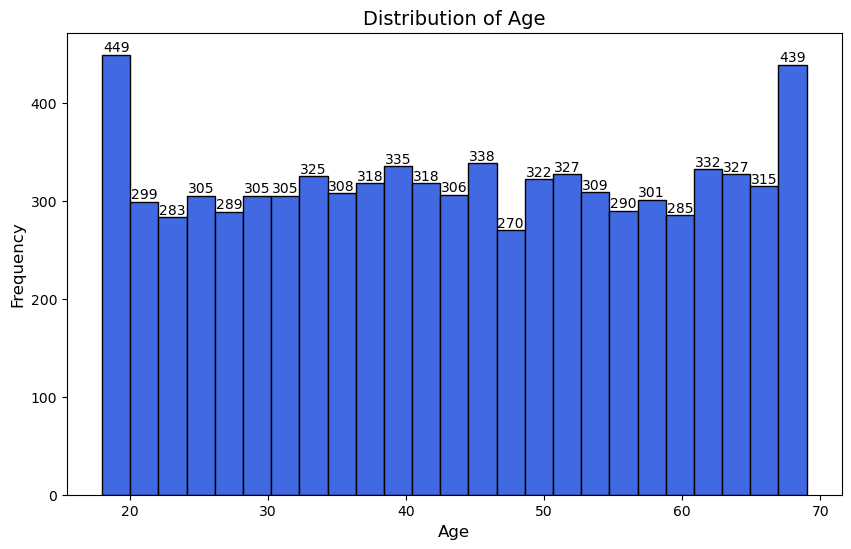

In [21]:
kbins = KBinsDiscretizer(n_bins=25, encode='ordinal', strategy='uniform')
marketing_data['Age_binned'] = kbins.fit_transform(marketing_data[['Age']])

# Now plot the histogram using matplotlib
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(marketing_data['Age'], bins=25, color='royalblue', edgecolor='black')

# Adding title and labels
plt.title('Distribution of Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add frequency values on top of each bar
for i in range(len(patches)):
    height = patches[i].get_height()
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, height, str(int(height)),
             ha='center', va='bottom', fontsize=10)

plt.show()

The distribution appears relatively balanced across different age groups, with some fluctuations.
There are noticeable peaks at the youngest (18–20) and oldest (66-68) age groups. The spikes at young and older ages might indicate specific age-related segmentation in the dataset (e.g., students and retirees).

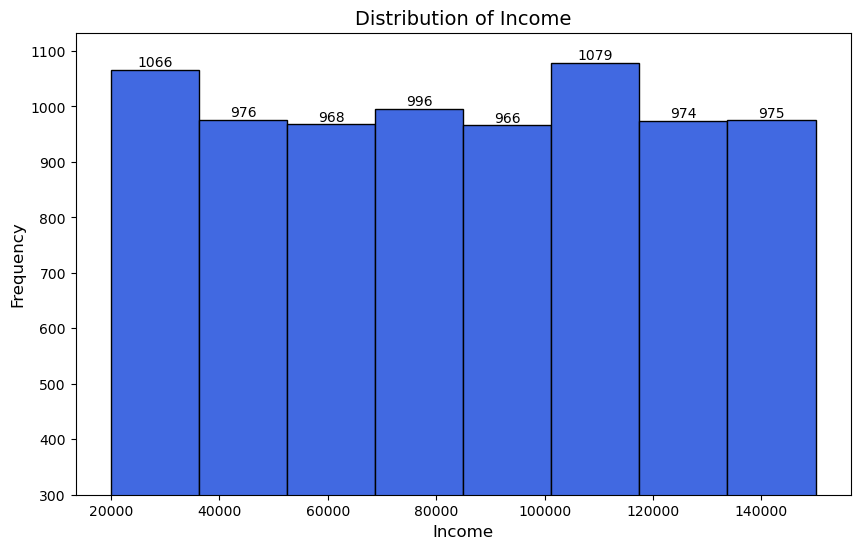

In [23]:
# Plotting the histogram for 'Income' with 8 bins
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(marketing_data['Income'], bins=8, color='royalblue', edgecolor='black')

# Adding title and labels
plt.title('Distribution of Income', fontsize=14)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add frequency values on top of each bar
for i in range(len(patches)):
    height = patches[i].get_height()
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, height, str(int(height)),
             ha='center', va='bottom', fontsize=10)

# Set the lower limit of the y-axis
plt.ylim(bottom=300)

plt.show()

The distribution of income does not show strong skewness; it is somewhat balanced.

In [15]:
fig = px.scatter(
    marketing_data,
    x='AdSpend',
    y='ConversionRate',
    color='CampaignChannel',
    title='Ad Spend vs. Conversion Rate by Campaign Channel',
    hover_data=['CampaignType']
)
fig.show()

In [16]:
fig = px.bar(
    marketing_data.groupby('CampaignType', as_index=False)['EmailOpens'].sum(),
    x='CampaignType',
    y='EmailOpens',
    title='Total Email Opens by Campaign Type'
)
fig.show()

In [17]:
fig = px.pie(
    marketing_data,
    names='CampaignType',
    title='Distribution of Campaign Types'
)
fig.show()

In [18]:
fig = px.pie(
    marketing_data,
    names='CampaignChannel',
    title='Distribution of Campaign Channels'
)
fig.show()

In [19]:
fig = px.bar(
    marketing_data.groupby('WebsiteVisits', as_index=False)['ClickThroughRate'].sum(),
    x='WebsiteVisits',
    y='ClickThroughRate',
    title='Clickthrough rate by website visits'
)
fig.show()

In [13]:
fig = px.bar(
    marketing_data.groupby('WebsiteVisits', as_index=False)['ClickThroughRate'].mean(),
    x='WebsiteVisits',
    y='ClickThroughRate',
    title='Average clickthrough rate by website visits'
)
fig.show()

In [14]:
fig = px.bar(
    marketing_data.groupby('EmailOpens', as_index=False)['EmailClicks'].mean(),
    x='EmailOpens',
    y='EmailClicks',
    title='Email clicks by email opens'
)
fig.show()